# Let's talk about high-amplitude variables.

Personal motivation: I've been working hard on (re-)reducing the photometry in 5 star forming regions (Cyg OB7, ONC, NGC 1333, IC348, and Mon R2) and I'd like to ensure that my reduction is publishable. I want to include all 5 regions, and for the scientific analysis to be *very easy* so that it does not drag out at all.

Science motivation: There are certain kinds of variable stars that are relatively quiescent for long periods of time but then undergo large swings in brightness. It would be valuable to catalog where we find them!

Especially in the age of deep, high-cadence all-sky (or large-sky) optical surveys such as TESS, K2, Gaia, Pan-STARRS, LSST, VISTA... this kind of science will have lots of advances in this decade.  And we're sitting on some valuable data ourselves.

# What I did here

Among the 5 WFCAM/UKIRT monitoring programs, I have (a) computed variability statistics, (b) separated stars into data quality bins based on their photometric error processing flags and other metadata, and (c) identified "quality" stars whose peak-to-peak variability amplitude (90-10) is at least one magnitude in at least one band. Caveat: there may be more stars with slightly problematic (but usable) data which are not included in this set; those other stars would require subjective verification.

Below are maps and simple light curves of these objects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates

import warnings
warnings.filterwarnings('ignore')

In [2]:
from wuvars.data import spreadsheet, photometry

spread = spreadsheet.load_v1()
phot = photometry.load_v1()
phot_grouped = photometry.load_v1_grouped(phot)

from wuvars.analysis.variability_selection import sq0, sq1, sq2, sq0_variables, sq1_variables, sq2_variables

from wuvars.analysis.sidsep import sidsep

Loading WSERV1 photometry data... DONE (elapsed time: 3.72s)
Loading WSERV5 photometry data... DONE (elapsed time: 0.93s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.40s)
Loading WSERV8 photometry data... DONE (elapsed time: 1.52s)
Loading WSERV11 photometry data... DONE (elapsed time: 1.56s)
Grouping WSERV1 photometry data... DONE (elapsed time: 32.61s)
Grouping WSERV5 photometry data... DONE (elapsed time: 3.47s)
Grouping WSERV7 photometry data... DONE (elapsed time: 3.22s)
Grouping WSERV8 photometry data... DONE (elapsed time: 2.17s)
Grouping WSERV11 photometry data... DONE (elapsed time: 3.25s)


In [3]:
wserv_ids = [1, 5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

min_Stetson_list = [2, 3, 1.6, 1.6, 4]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

Cyg OB7              has 23 high-amplitude variables (>0.6 mag)
Orion Nebula Cluster has 18 high-amplitude variables (>0.6 mag)
NGC 1333             has 3 high-amplitude variables (>0.6 mag)
IC 348               has 4 high-amplitude variables (>0.6 mag)
Mon R2               has 16 high-amplitude variables (>0.6 mag)


Text(0, 0.5, 'K variability amplitude (90-10 range)')

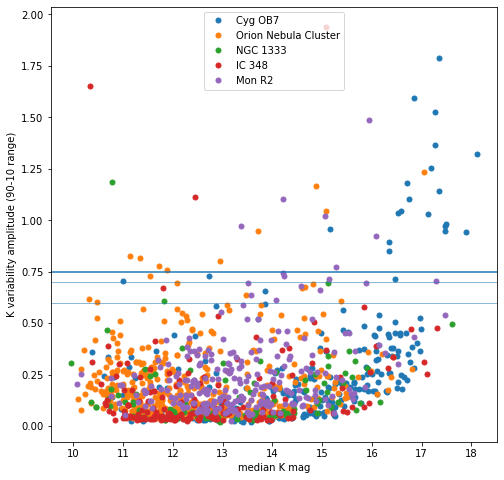

In [4]:
fig, ax = plt.subplots(figsize=(8,8))

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    ds = spread[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    x_array = ds['median']['KAPERMAG3'][v1]
    y_array = ds['range_9010']['KAPERMAG3'][v1]
    
    plt.plot(x_array, y_array, 'o', ms=5, label=SFR_dict[wserv])
    
    hi_amp = 0.6
    
    print(f"{SFR_dict[wserv]:20s} has {np.sum(y_array>hi_amp)} high-amplitude variables (>{hi_amp} mag)")

plt.legend(loc='upper center')
ax.axhline(0.75)
ax.axhline(0.7, lw=0.5)
ax.axhline(0.6, lw=0.5)
plt.xlabel("median K mag")
plt.ylabel("K variability amplitude (90-10 range)")







WSERV1 has 19 high-amplitude variables (>1.0 mag)

WSERV1 HI-AMP #0 (Sourceid 4402 7709 7793 78)
  RA: 315.15405712981936, DEC: 52.85103509999879
  21h00m36.9737s +52d51m03.7264s




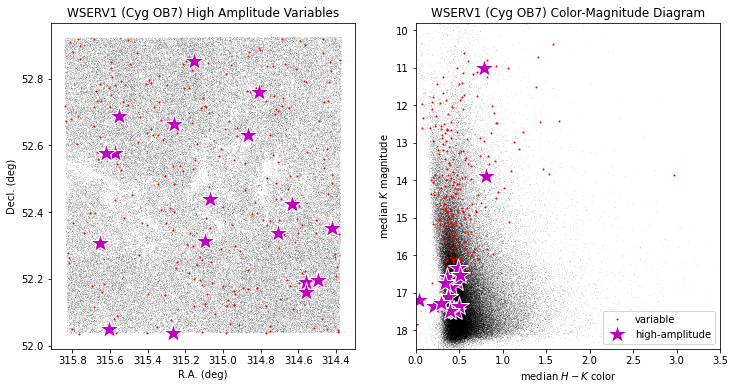

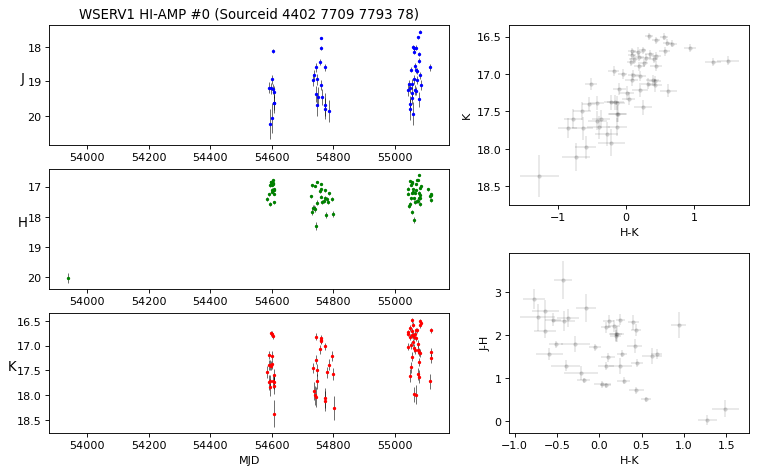


WSERV1 HI-AMP #1 (Sourceid 4402 7709 8156 82)
  RA: 314.80678393157115, DEC: 52.760248058799306
  20h59m13.6281s +52d45m36.893s




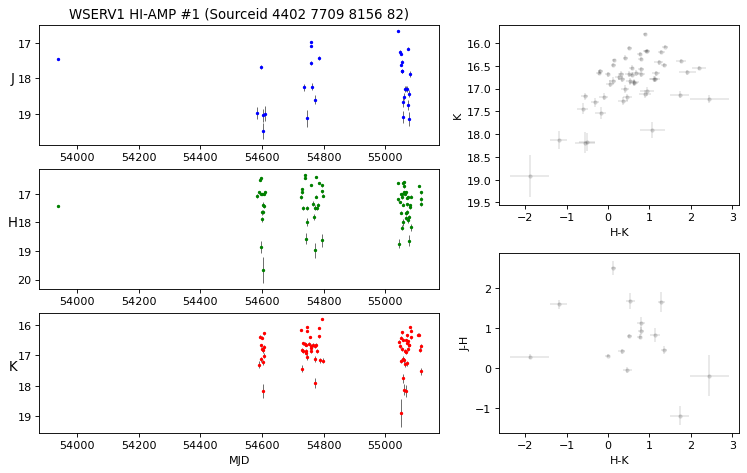


WSERV1 HI-AMP #2 (Sourceid 4402 7709 9000 85)
  RA: 315.2618853192698, DEC: 52.66494310560494
  21h01m02.8525s +52d39m53.7952s




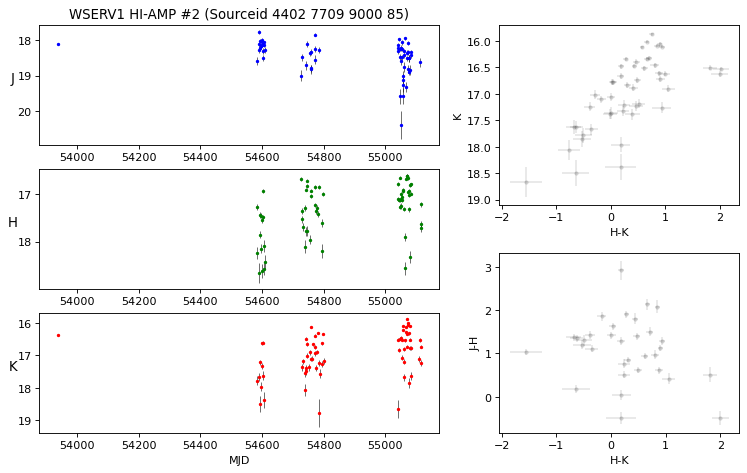


WSERV1 HI-AMP #3 (Sourceid 4402 7709 9288 95)
  RA: 314.8677979420793, DEC: 52.63060583262709
  20h59m28.2715s +52d37m50.181s




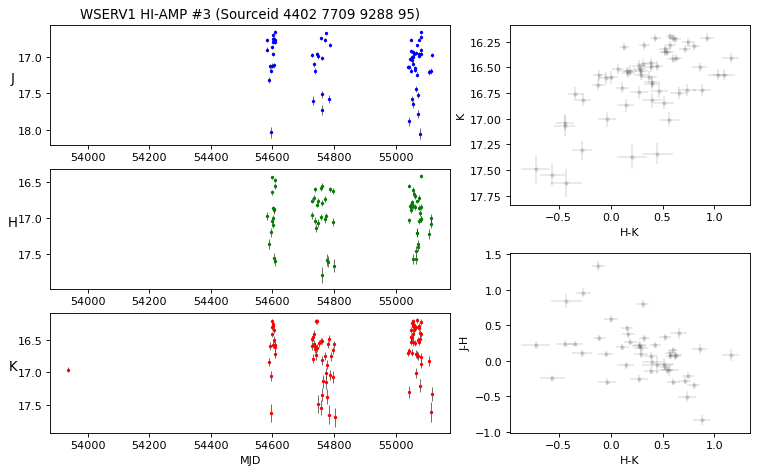


WSERV1 HI-AMP #4 (Sourceid 4402 7709 9507 97)
  RA: 315.5542959944523, DEC: 52.68884176953638
  21h02m13.031s +52d41m19.8304s




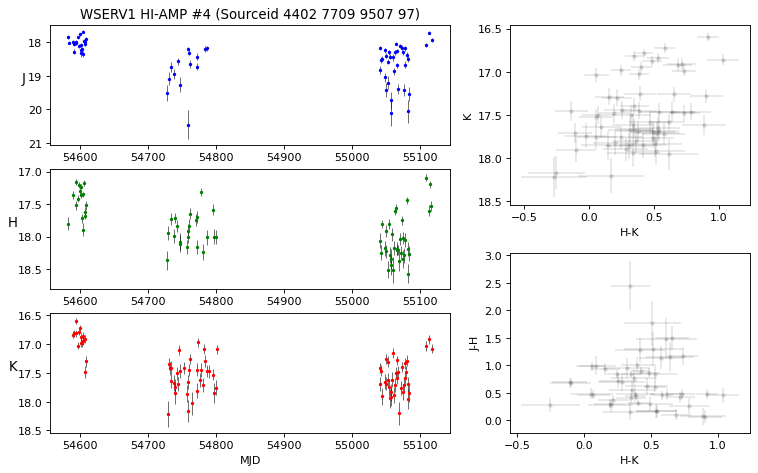


WSERV1 HI-AMP #5 (Sourceid 4402 7709 9519 23)
  RA: 315.57586262828704, DEC: 52.57590313083287
  21h02m18.207s +52d34m33.2513s




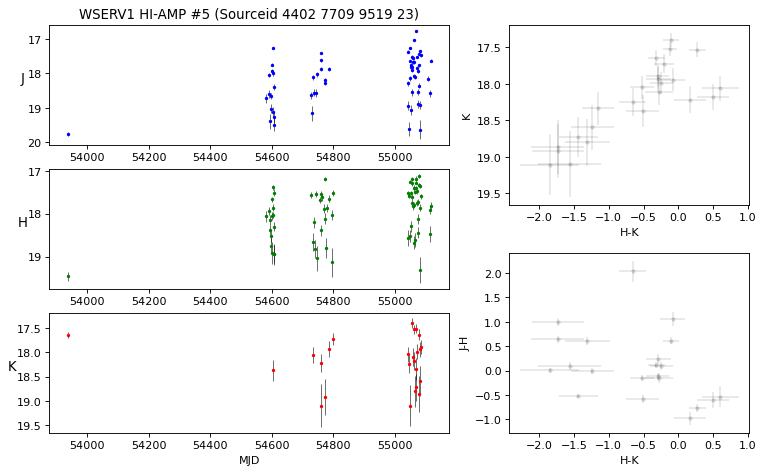


WSERV1 HI-AMP #6 (Sourceid 4402 7709 9537 30)
  RA: 315.6229204329755, DEC: 52.57579175388794
  21h02m29.5009s +52d34m32.8503s




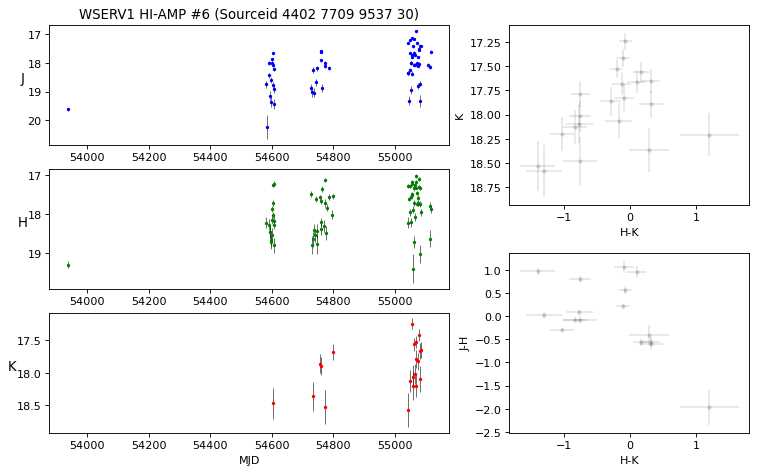


WSERV1 HI-AMP #7 (Sourceid 4402 7709 9704 97)
  RA: 315.55428835201946, DEC: 52.68884071998389
  21h02m13.0292s +52d41m19.8266s




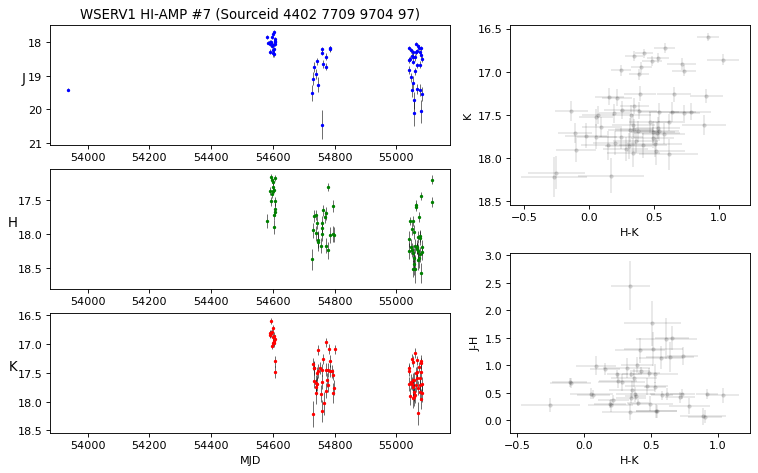


WSERV1 HI-AMP #8 (Sourceid 4402 7710 0091 82)
  RA: 315.6551549429986, DEC: 52.30810964059979
  21h02m37.2372s +52d18m29.1947s




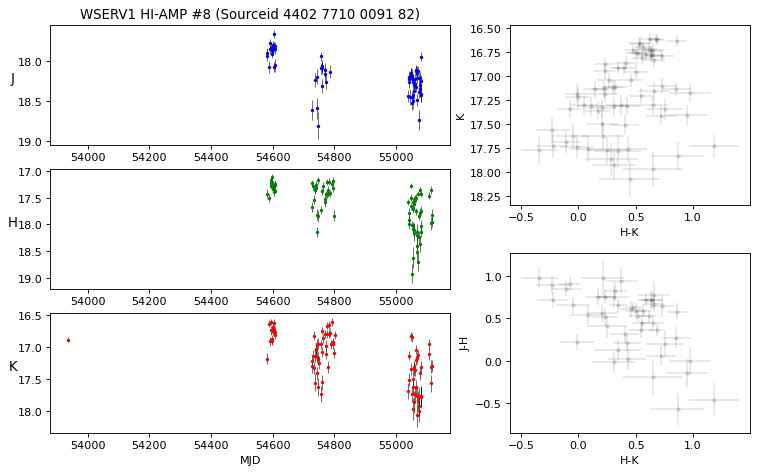


WSERV1 HI-AMP #9 (Sourceid 4402 7710 0195 67)
  RA: 314.70856988498247, DEC: 52.33823155695098
  20h58m50.0568s +52d20m17.6336s




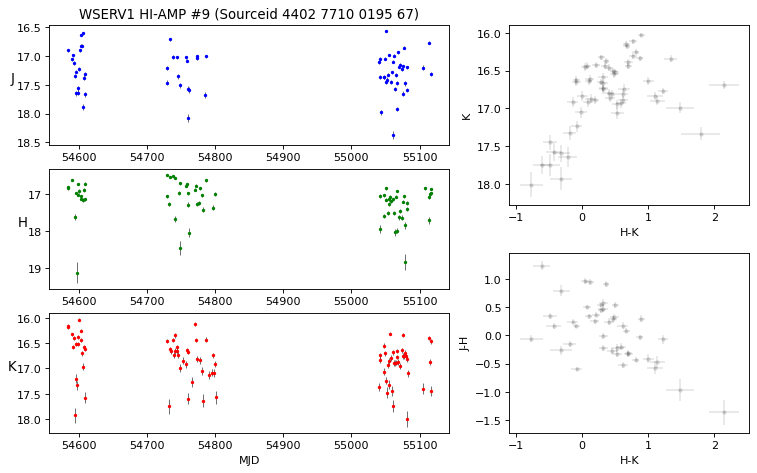


WSERV1 HI-AMP #10 (Sourceid 4402 7710 0231 86)
  RA: 314.63148063244535, DEC: 52.4246275985072
  20h58m31.5554s +52d25m28.6594s




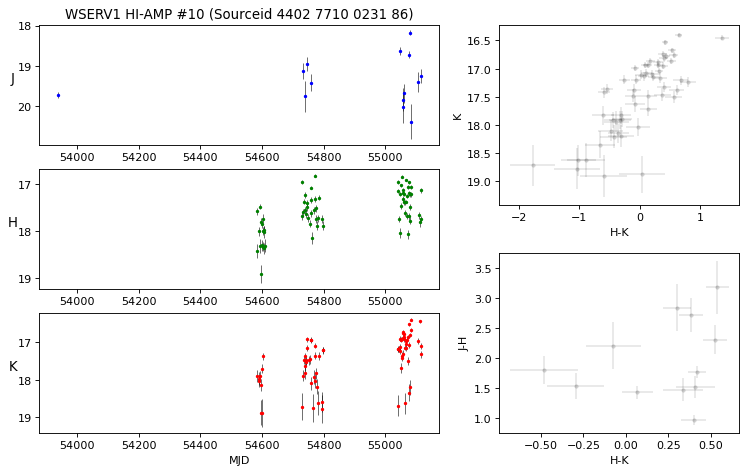


WSERV1 HI-AMP #11 (Sourceid 4402 7710 0419 19)
  RA: 314.42151748172665, DEC: 52.352647886432386
  20h57m41.1642s +52d21m09.5324s




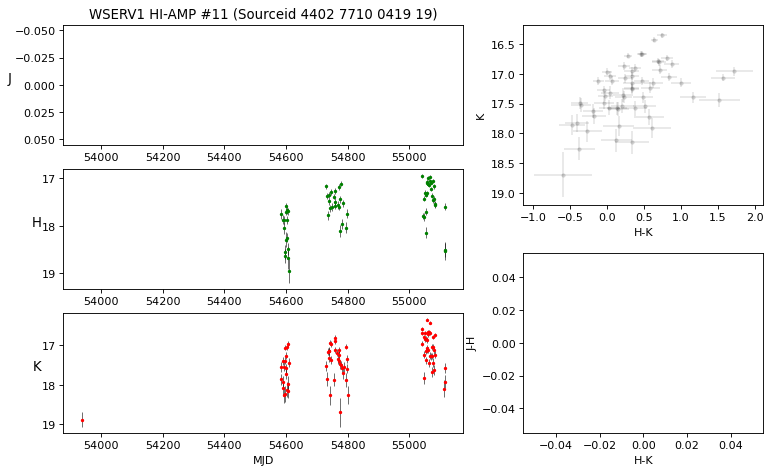


WSERV1 HI-AMP #12 (Sourceid 4402 7710 0458 34)
  RA: 315.09474790135533, DEC: 52.31190087255322
  21h00m22.7395s +52d18m42.8431s




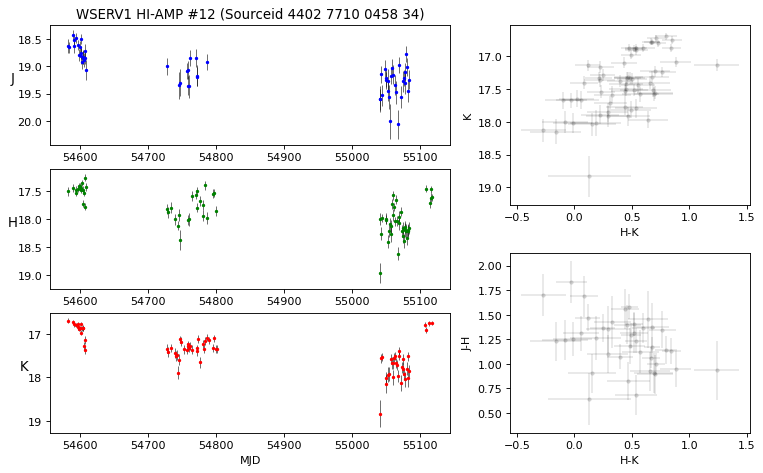


WSERV1 HI-AMP #13 (Sourceid 4402 7710 0466 52)
  RA: 315.06904415917967, DEC: 52.43975157962605
  21h00m16.5706s +52d26m23.1057s




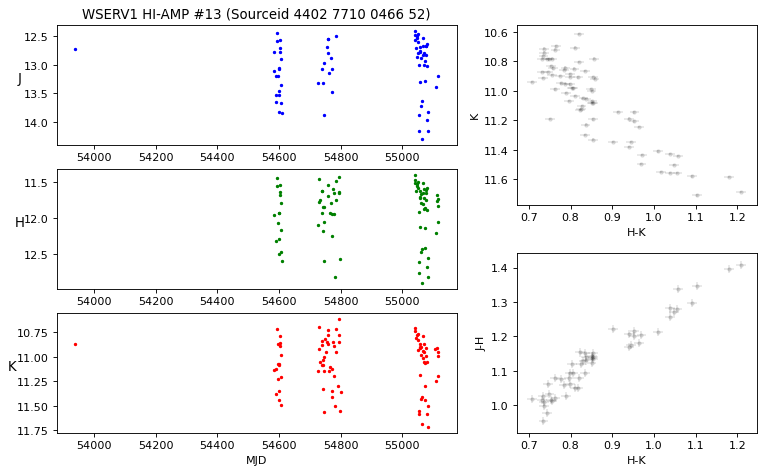


WSERV1 HI-AMP #14 (Sourceid 4402 7710 0919 36)
  RA: 315.26412892448343, DEC: 52.03728788423934
  21h01m03.3909s +52d02m14.2364s




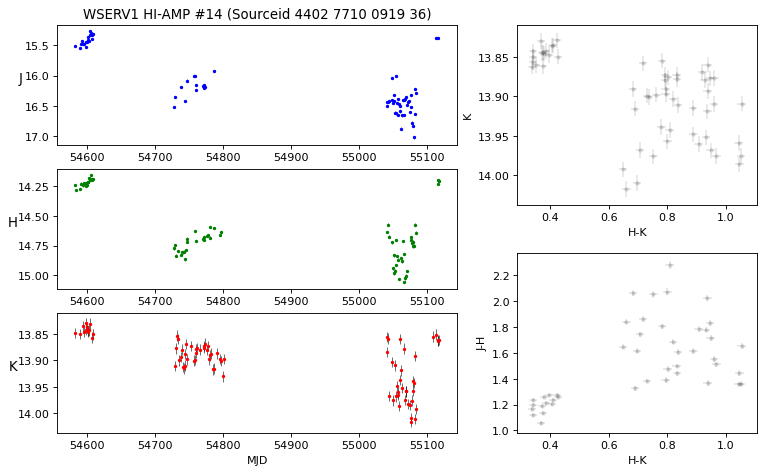


WSERV1 HI-AMP #15 (Sourceid 4402 7710 1233 14)
  RA: 315.60667840595664, DEC: 52.04842712172931
  21h02m25.6028s +52d02m54.3376s




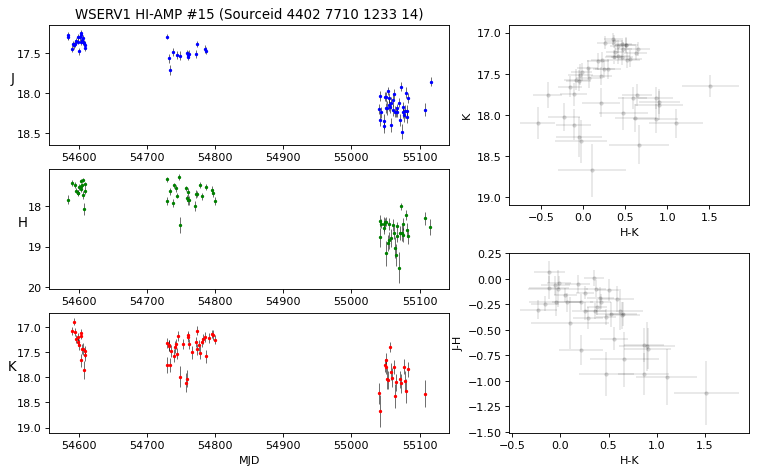


WSERV1 HI-AMP #16 (Sourceid 4402 7710 1482 86)
  RA: 314.55955083448305, DEC: 52.19066215253795
  20h58m14.2922s +52d11m26.3837s




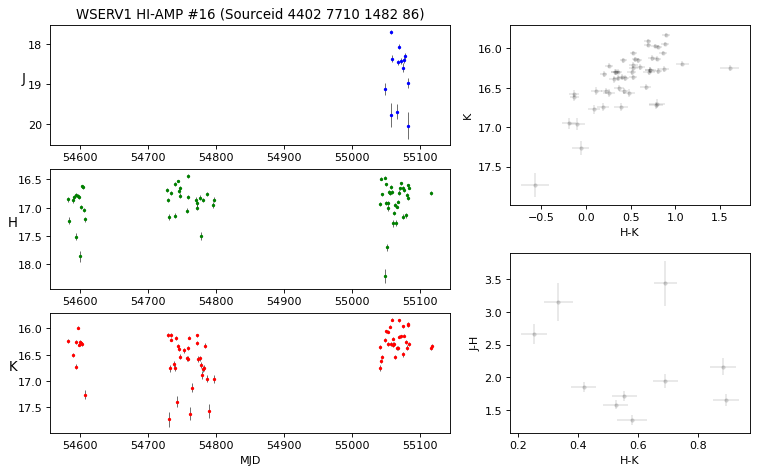


WSERV1 HI-AMP #17 (Sourceid 4402 7710 1482 95)
  RA: 314.5596602720239, DEC: 52.162064211653544
  20h58m14.3185s +52d09m43.4312s




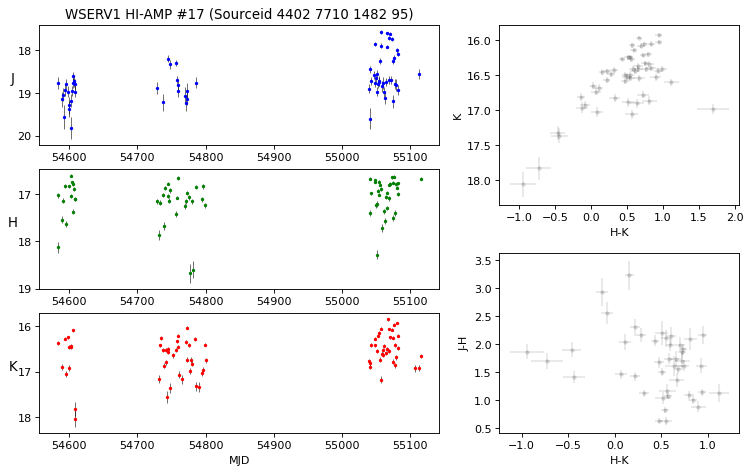


WSERV1 HI-AMP #18 (Sourceid 4402 7710 1520 30)
  RA: 314.49656190383376, DEC: 52.19800788635491
  20h57m59.1749s +52d11m52.8284s




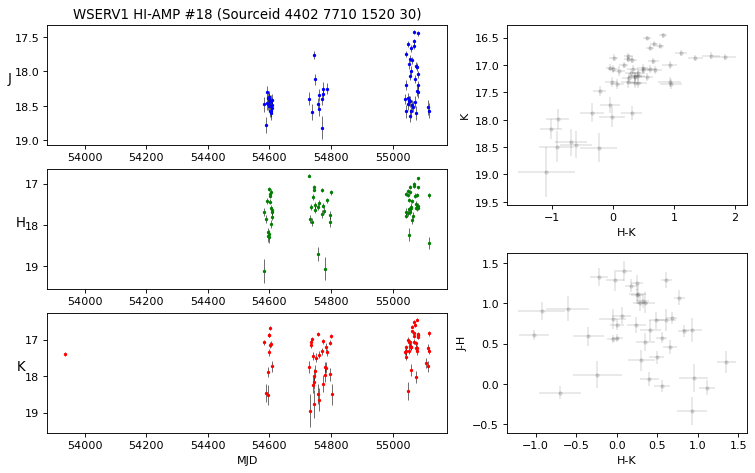







WSERV5 has 14 high-amplitude variables (>1.0 mag)

WSERV5 HI-AMP #0 (Sourceid 4419 9508 4435 08)
  RA: 83.88519062351138, DEC: -5.251901857185543
  05h35m32.4457s -05d15m06.8467s




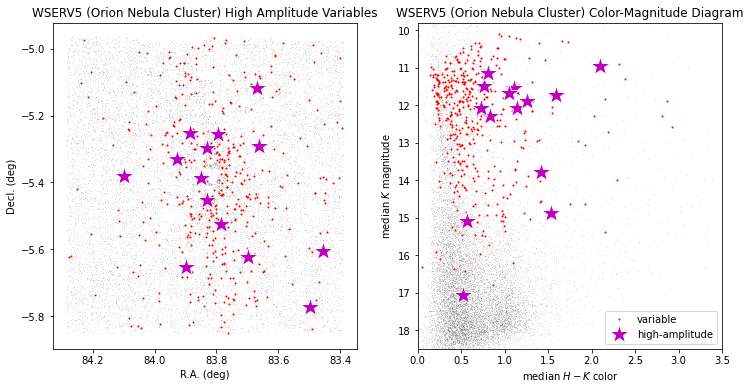

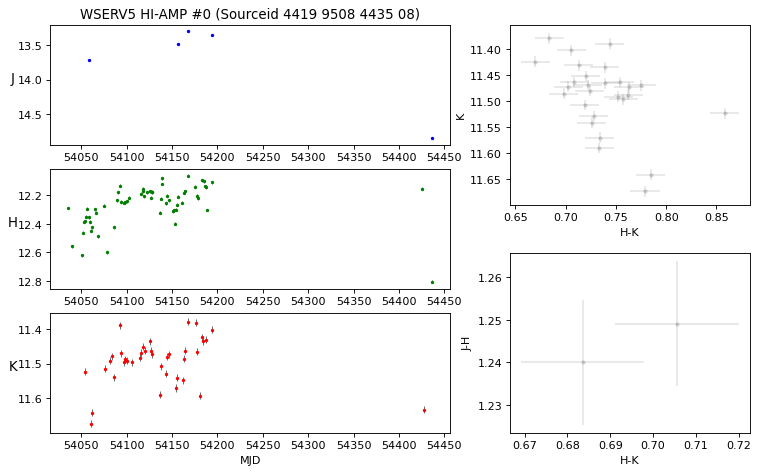


WSERV5 HI-AMP #1 (Sourceid 4419 9508 4773 22)
  RA: 83.45643917188856, DEC: -5.605794714911367
  05h33m49.5454s -05d36m20.861s




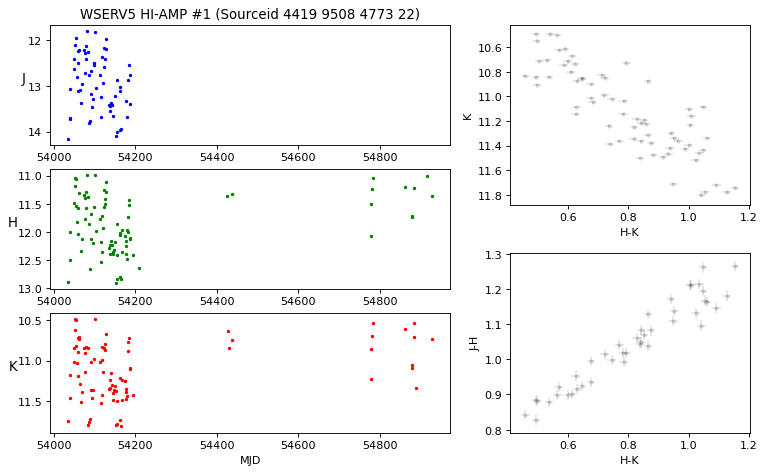


WSERV5 HI-AMP #2 (Sourceid 4419 9508 4852 14)
  RA: 83.66935649553795, DEC: -5.116309724437415
  05h34m40.6456s -05d06m58.715s




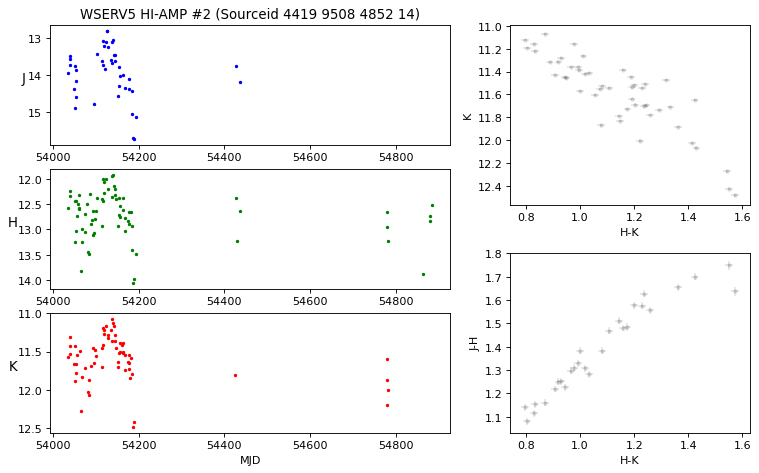


WSERV5 HI-AMP #3 (Sourceid 4419 9508 5120 52)
  RA: 83.83153700379954, DEC: -5.451283950597977
  05h35m19.5689s -05d27m04.6222s




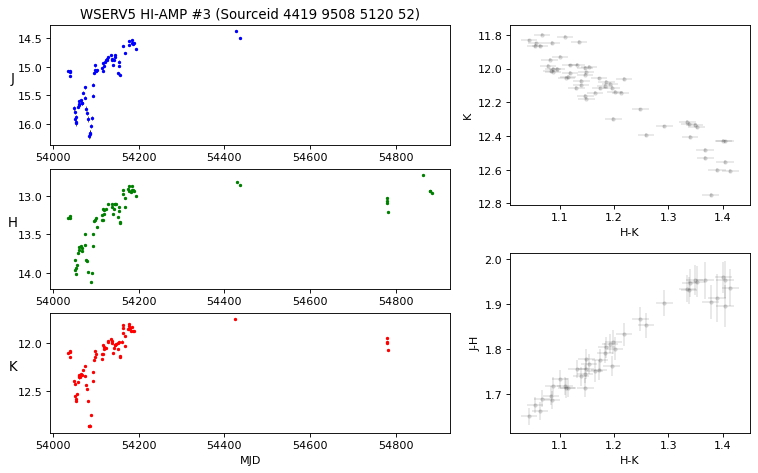


WSERV5 HI-AMP #4 (Sourceid 4419 9508 5126 32)
  RA: 83.78625905082517, DEC: -5.524316920126201
  05h35m08.7022s -05d31m27.5409s




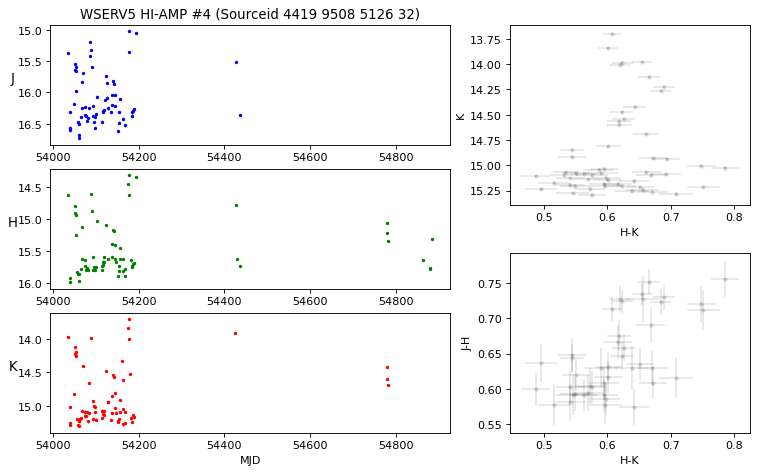


WSERV5 HI-AMP #5 (Sourceid 4419 9508 5140 33)
  RA: 83.69856436239176, DEC: -5.623629039931618
  05h34m47.6554s -05d37m25.0645s




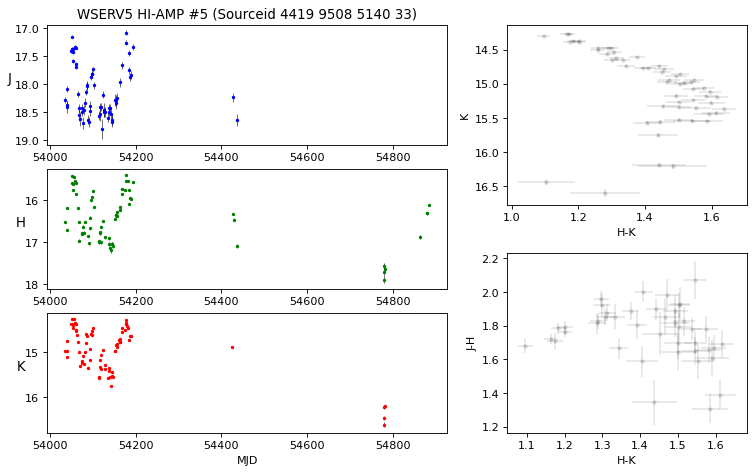


WSERV5 HI-AMP #6 (Sourceid 4419 9508 5198 63)
  RA: 83.82897480436435, DEC: -5.29768694239488
  05h35m18.954s -05d17m51.673s




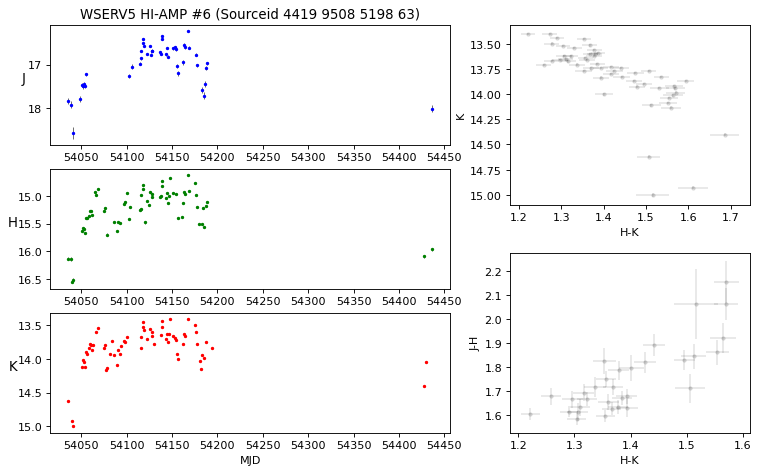


WSERV5 HI-AMP #7 (Sourceid 4419 9508 5199 31)
  RA: 83.66302866626319, DEC: -5.291892774233639
  05h34m39.1269s -05d17m30.814s




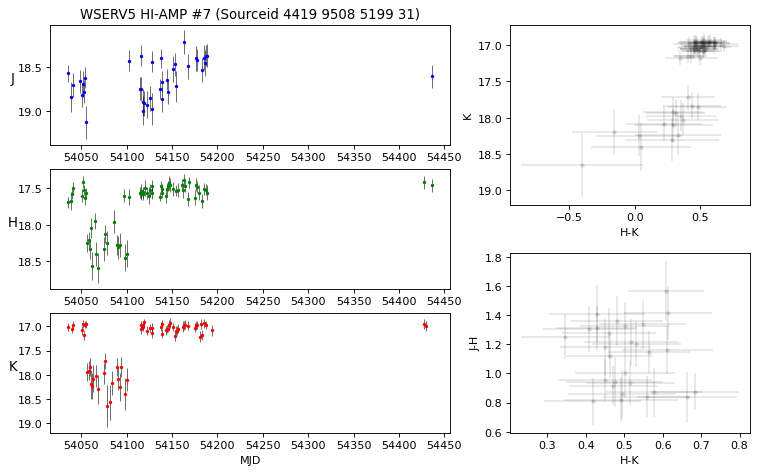


WSERV5 HI-AMP #8 (Sourceid 4419 9508 5203 82)
  RA: 83.79579442872702, DEC: -5.256043012348628
  05h35m10.9907s -05d15m21.7548s




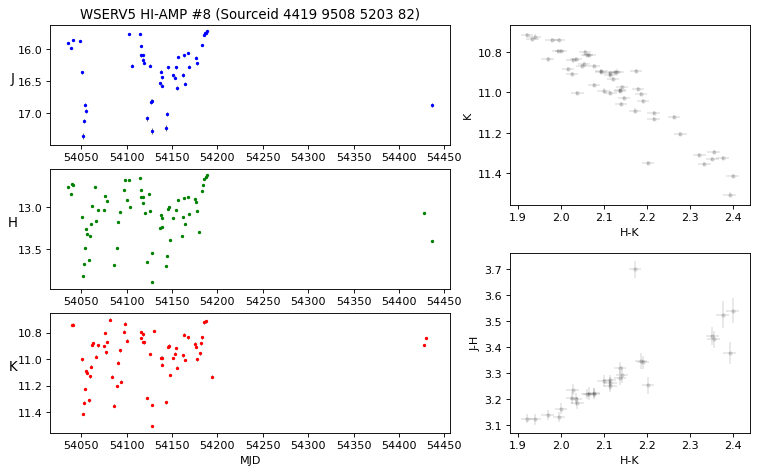


WSERV5 HI-AMP #9 (Sourceid 4419 9508 5246 80)
  RA: 84.09850648461456, DEC: -5.3795086354619315
  05h36m23.6416s -05d22m46.2311s




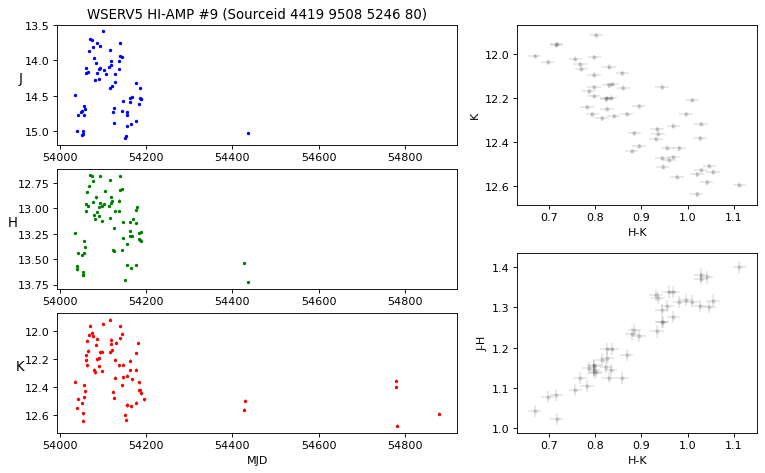


WSERV5 HI-AMP #10 (Sourceid 4419 9508 5608 67)
  RA: 83.85010912819797, DEC: -5.387195055620291
  05h35m24.0262s -05d23m13.9022s




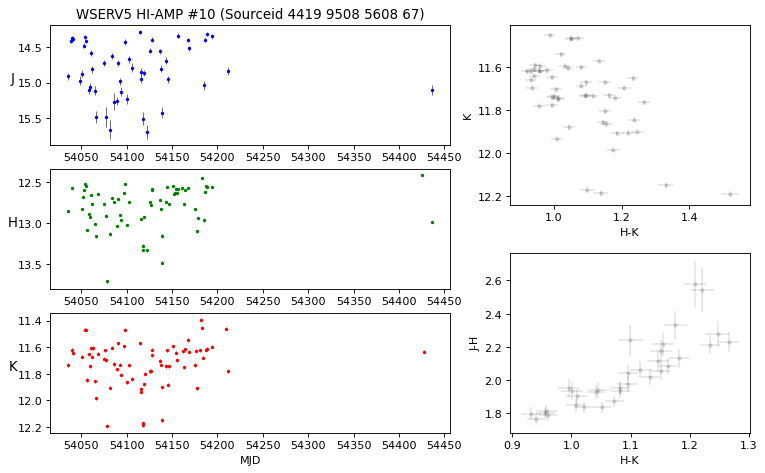


WSERV5 HI-AMP #11 (Sourceid 4419 9508 5615 60)
  RA: 83.92814450521038, DEC: -5.329282146829157
  05h35m42.7547s -05d19m45.4157s




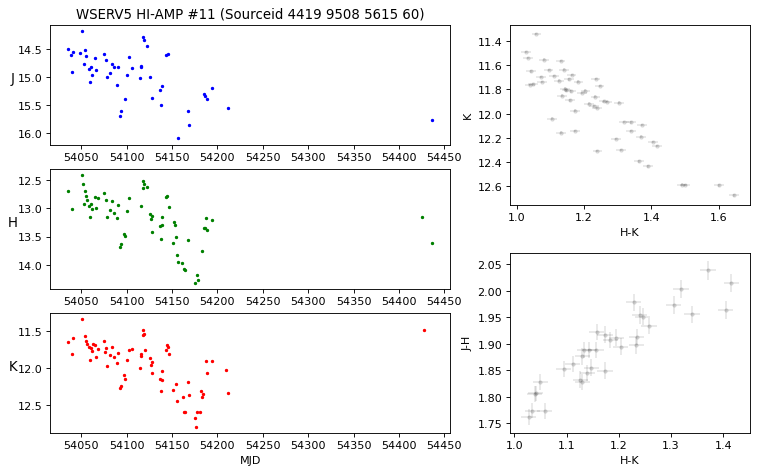


WSERV5 HI-AMP #12 (Sourceid 4419 9508 5649 16)
  RA: 83.89834307122685, DEC: -5.652249399776175
  05h35m35.6023s -05d39m08.0978s




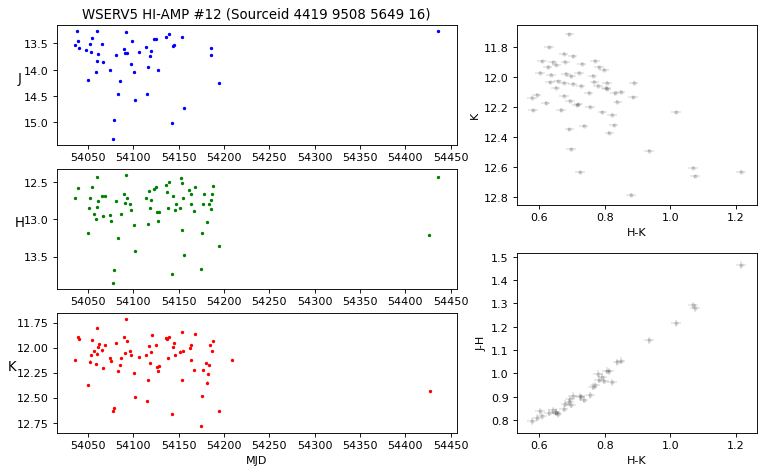


WSERV5 HI-AMP #13 (Sourceid 4419 9508 5755 17)
  RA: 83.49683083241773, DEC: -5.773118998412014
  05h33m59.2394s -05d46m23.2284s




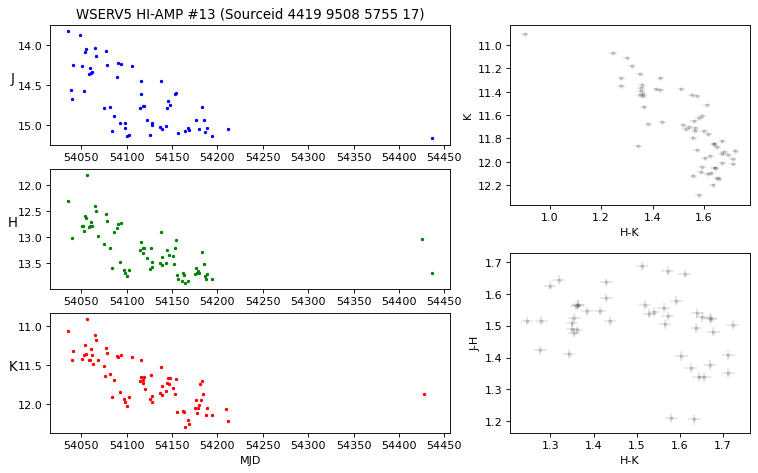







WSERV7 has 1 high-amplitude variables (>1.0 mag)

WSERV7 HI-AMP #0 (Sourceid 4450 8746 1163 11)
  RA: 52.24339505837842, DEC: 31.37157551505553
  03h28m58.4148s +31d22m17.6719s




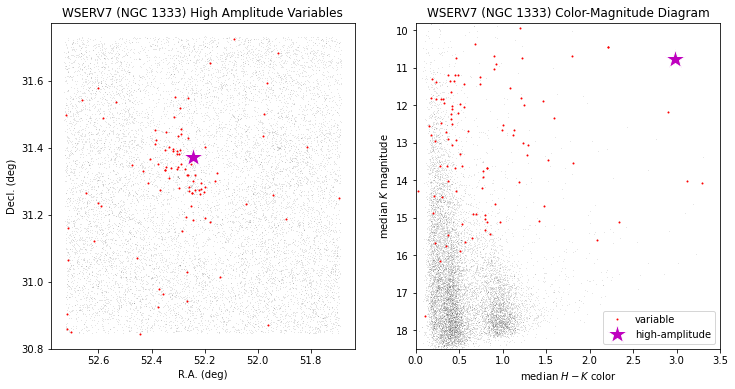

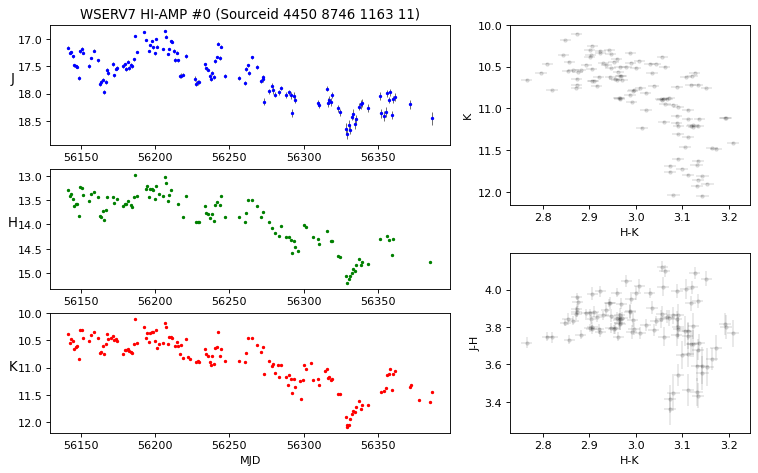







WSERV8 has 4 high-amplitude variables (>1.0 mag)

WSERV8 HI-AMP #0 (Sourceid 4498 9782 4508 31)
  RA: 56.35451079722378, DEC: 31.96141242906667
  03h45m25.0826s +31d57m41.0847s




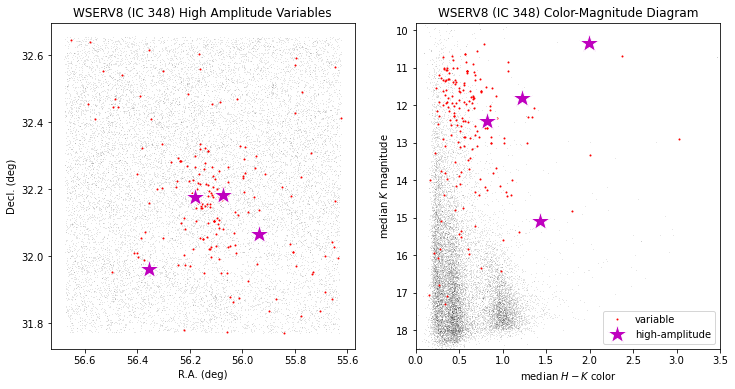

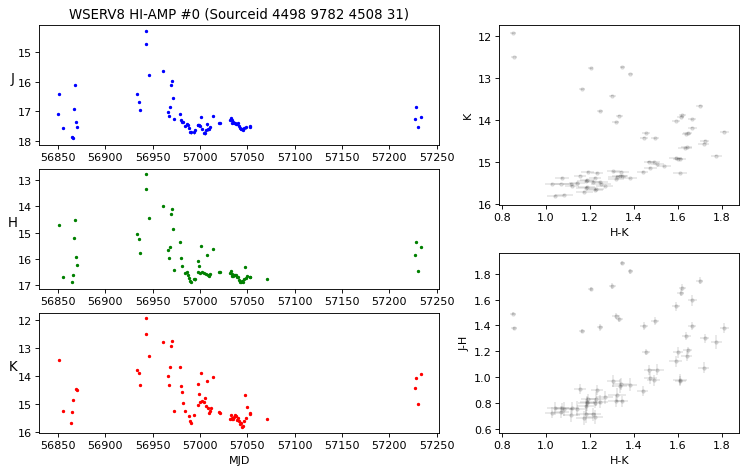


WSERV8 HI-AMP #1 (Sourceid 4498 9782 4681 28)
  RA: 56.07539376433941, DEC: 32.181519966832994
  03h44m18.0945s +32d10m53.4719s




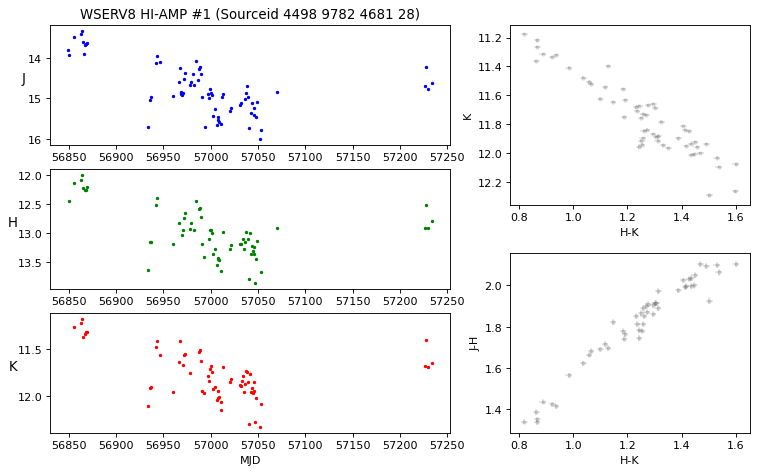


WSERV8 HI-AMP #2 (Sourceid 4498 9782 4697 83)
  RA: 55.93821296470495, DEC: 32.066273176073345
  03h43m45.1711s +32d03m58.5834s




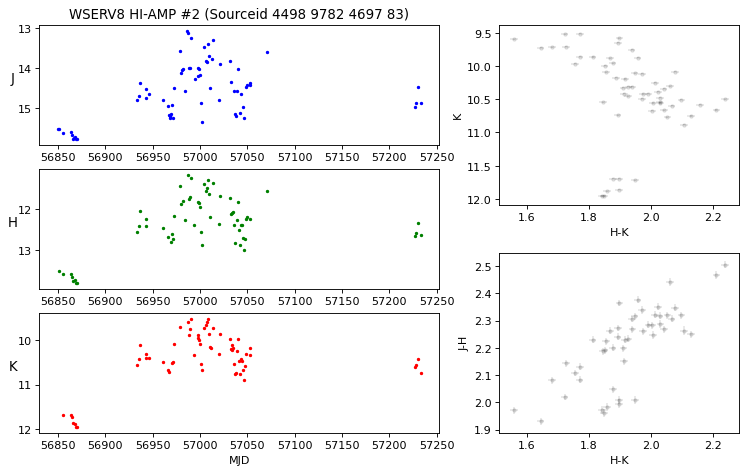


WSERV8 HI-AMP #3 (Sourceid 4498 9782 4949 45)
  RA: 56.18236723707733, DEC: 32.175102338449896
  03h44m43.7681s +32d10m30.3684s




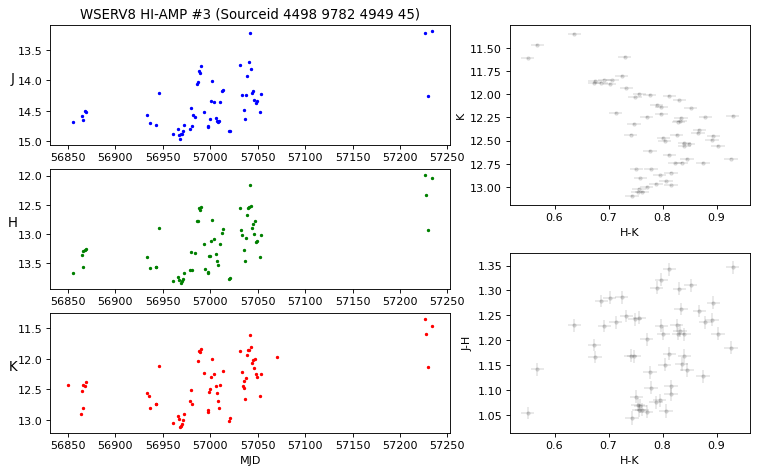







WSERV11 has 15 high-amplitude variables (>1.0 mag)

WSERV11 HI-AMP #0 (Sourceid 4519 5940 8633 93)
  RA: 91.91521820010725, DEC: -6.262131133619505
  06h07m39.6524s -06d15m43.6721s




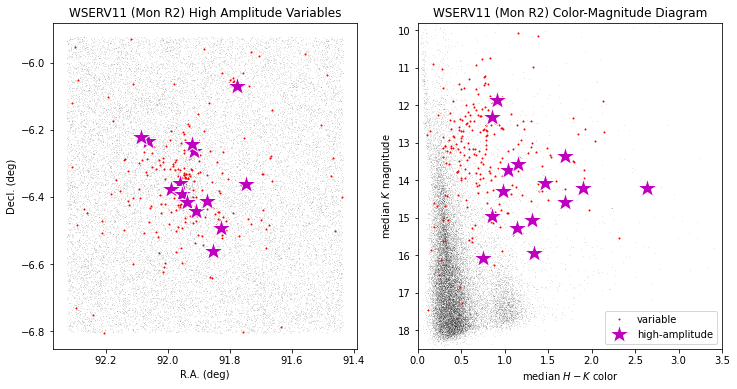

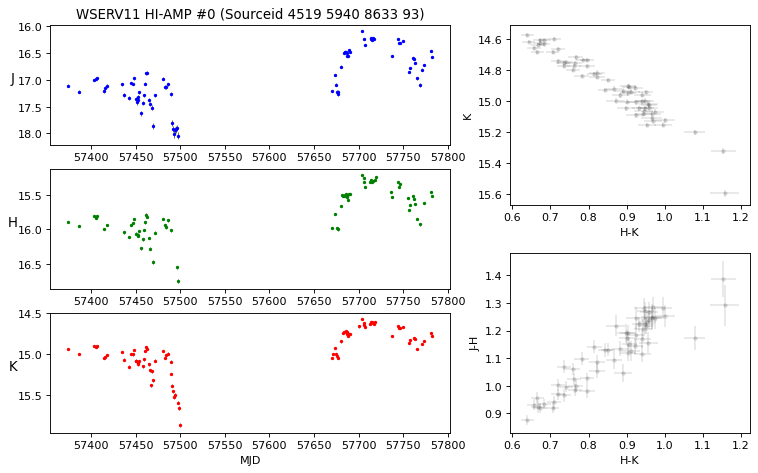


WSERV11 HI-AMP #1 (Sourceid 4519 5940 8634 52)
  RA: 91.92147864287126, DEC: -6.2422782947973054
  06h07m41.1549s -06d14m32.2019s




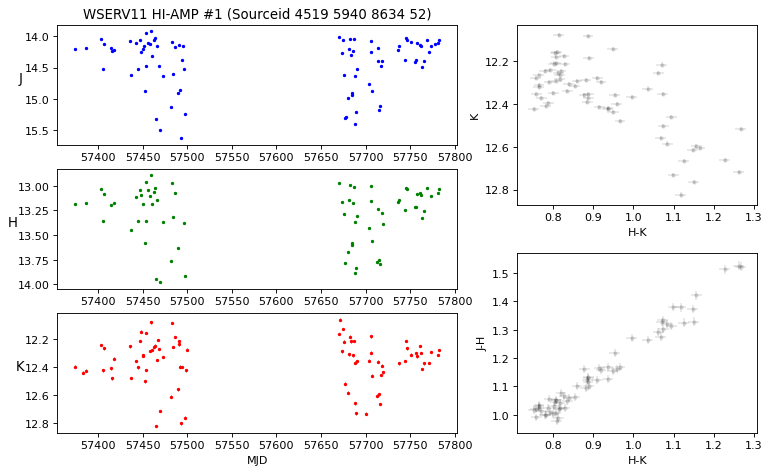


WSERV11 HI-AMP #2 (Sourceid 4519 5940 8639 95)
  RA: 91.96011482015841, DEC: -6.35928163136501
  06h07m50.4276s -06d21m33.4139s




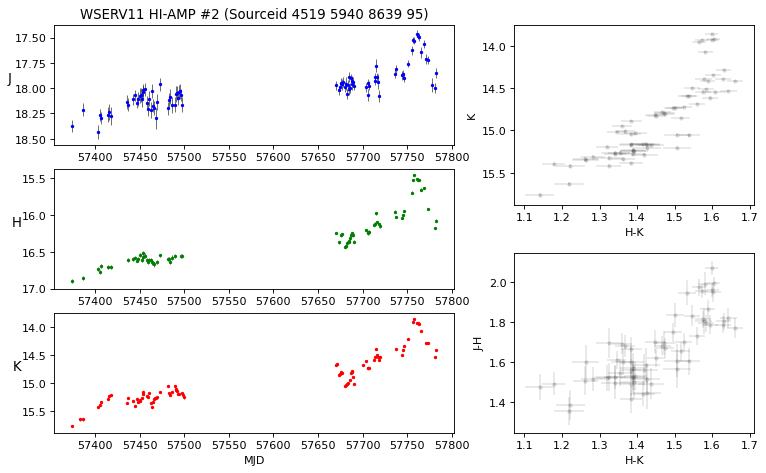


WSERV11 HI-AMP #3 (Sourceid 4519 5940 8653 81)
  RA: 92.06293734775163, DEC: -6.234665688236674
  06h08m15.105s -06d14m04.7965s




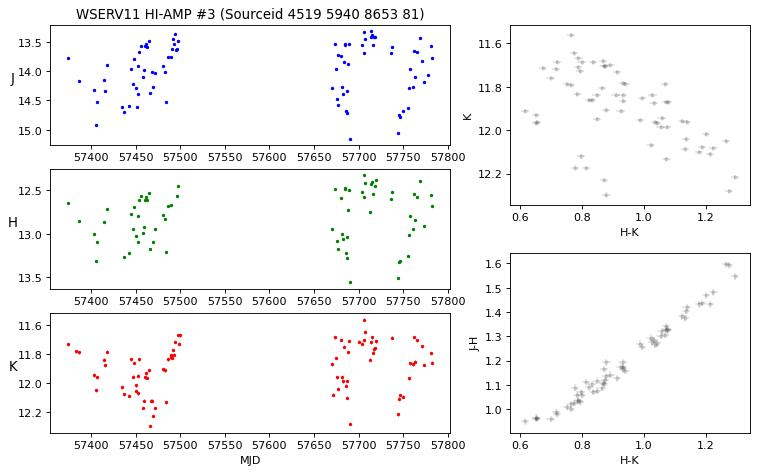


WSERV11 HI-AMP #4 (Sourceid 4519 5940 8656 01)
  RA: 92.08728678616664, DEC: -6.2205150629456565
  06h08m20.9488s -06d13m13.8542s




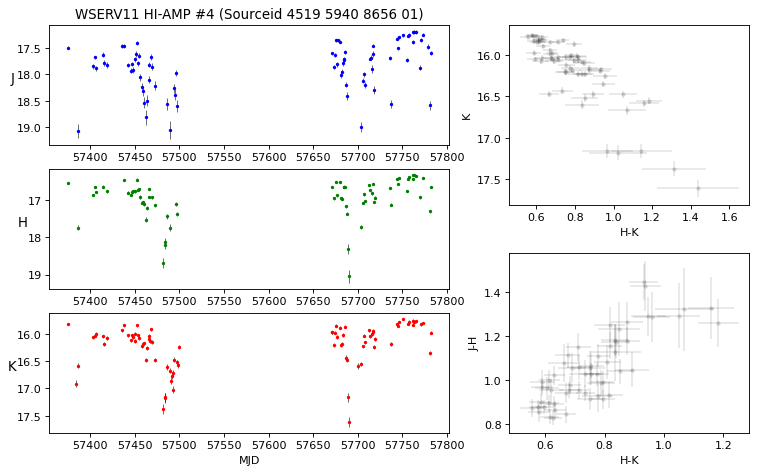


WSERV11 HI-AMP #5 (Sourceid 4519 5940 8823 74)
  RA: 91.74774497612931, DEC: -6.3631598445962885
  06h06m59.4588s -06d21m47.3754s




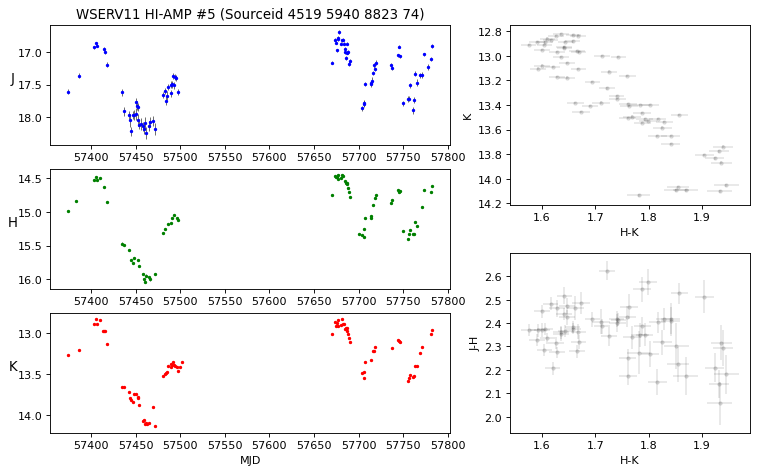


WSERV11 HI-AMP #6 (Sourceid 4519 5940 8887 84)
  RA: 91.99001525178431, DEC: -6.377884482383095
  06h07m57.6037s -06d22m40.3841s




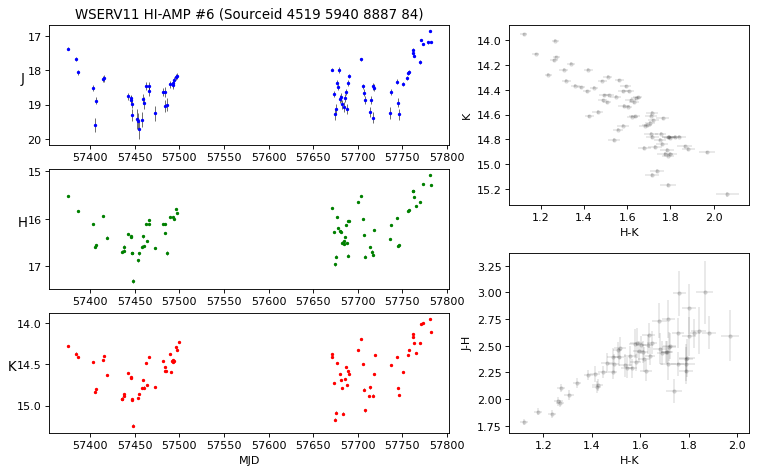


WSERV11 HI-AMP #7 (Sourceid 4519 5940 8890 25)
  RA: 91.95284790589042, DEC: -6.391775223933845
  06h07m48.6835s -06d23m30.3908s




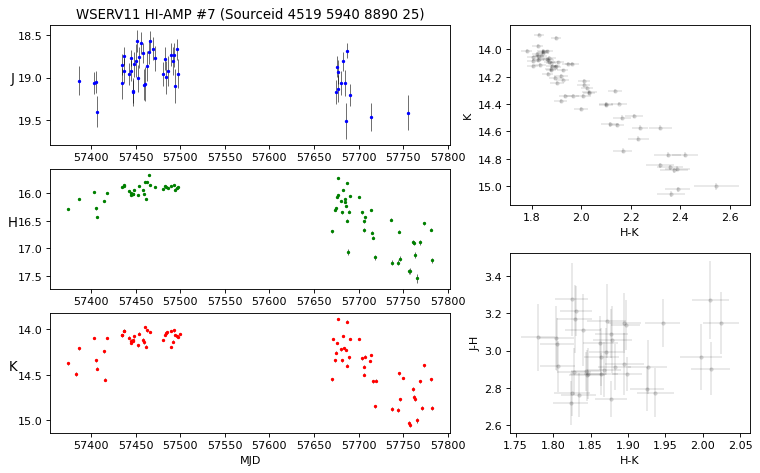


WSERV11 HI-AMP #8 (Sourceid 4519 5940 8894 15)
  RA: 91.93696423515294, DEC: -6.414582911940438
  06h07m44.8714s -06d24m52.4985s




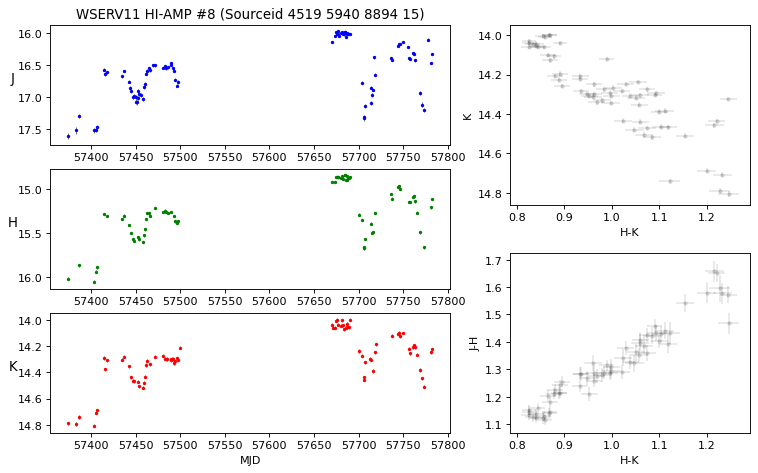


WSERV11 HI-AMP #9 (Sourceid 4519 5940 8896 71)
  RA: 91.90926361040076, DEC: -6.442789751409084
  06h07m38.2233s -06d26m34.0431s




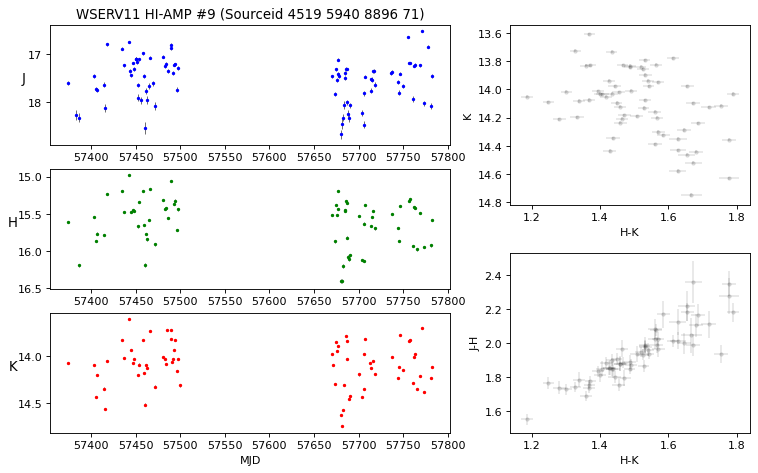


WSERV11 HI-AMP #10 (Sourceid 4519 5940 8992 79)
  RA: 91.87294284478999, DEC: -6.4125717975384795
  06h07m29.5063s -06d24m45.2585s




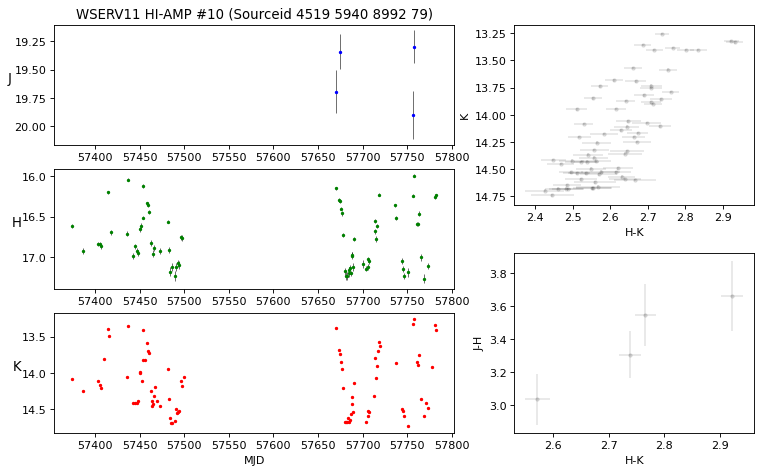


WSERV11 HI-AMP #11 (Sourceid 4519 5940 8994 14)
  RA: 91.85403633365077, DEC: -6.562063530285606
  06h07m24.9687s -06d33m43.4287s




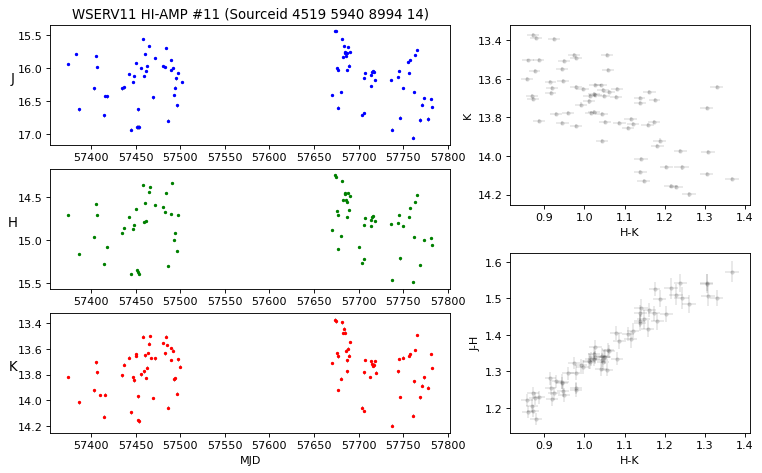


WSERV11 HI-AMP #12 (Sourceid 4519 5940 8996 28)
  RA: 91.8278294032313, DEC: -6.491391162138166
  06h07m18.6791s -06d29m29.0082s




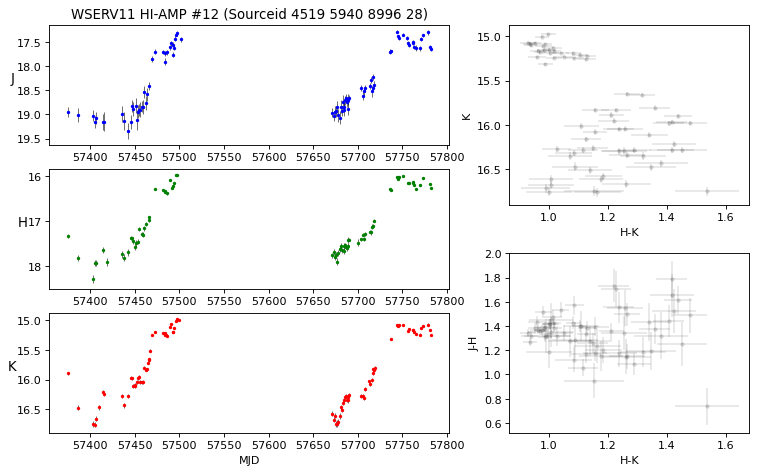


WSERV11 HI-AMP #13 (Sourceid 4519 5940 9108 43)
  RA: 91.77683381258555, DEC: -6.073758724522517
  06h07m06.4401s -06d04m25.5314s




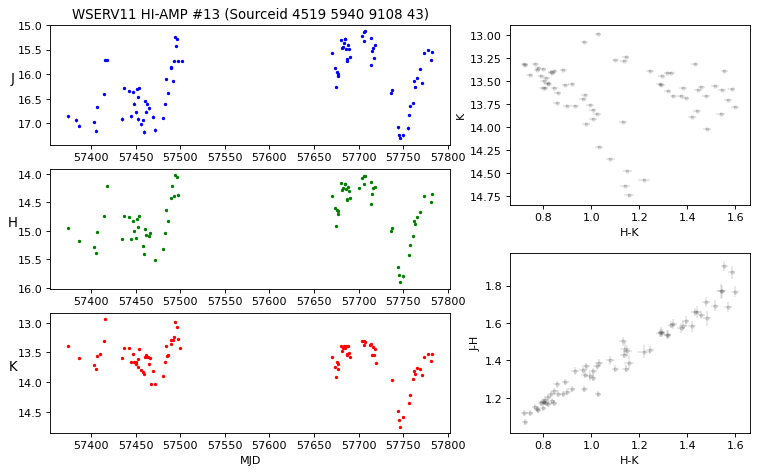


WSERV11 HI-AMP #14 (Sourceid 4519 5940 9108 81)
  RA: 91.77564506748097, DEC: -6.071169350833807
  06h07m06.1548s -06d04m16.2097s




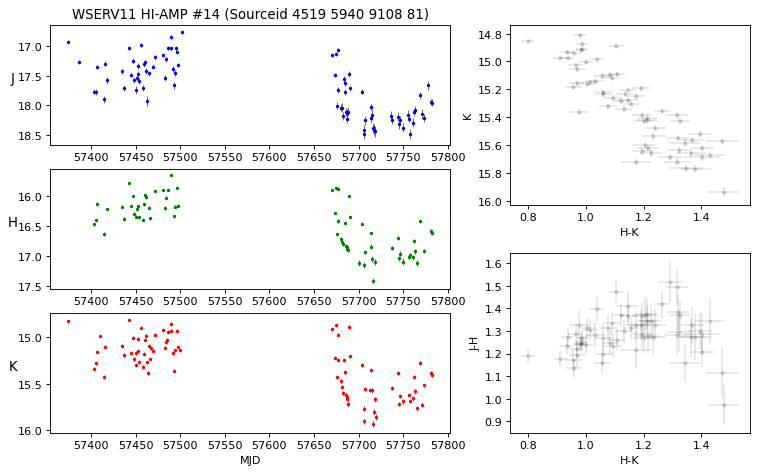

In [5]:
from wuvars.plotting.lightcurve import simple_lc

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    ds = spread[f'wserv{wserv}']
    dat = phot_grouped[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    hi_amp = 1.0
    
    krange = ds['range_9010']['KAPERMAG3']
    hrange = ds['range_9010']['HAPERMAG3']
    jrange = ds['range_9010']['JAPERMAG3']
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    # high-amps
    ha = v1 & ((jrange > hi_amp) | (hrange > hi_amp) | (krange > hi_amp))

    sourceids = ds[v1 & ha].index
    
    print("\n"*5)
    print(f"WSERV{wserv} has {np.sum(ha)} high-amplitude variables (>{hi_amp} mag)")
    
    fig, (map_ax, cmd_ax) = plt.subplots(ncols=2, figsize=(12,6))
    map_ax.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    map_ax.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.', ms=2)
    map_ax.plot(np.degrees(ds[ha]['mean']['RA']), np.degrees(ds[ha]['mean']['DEC']), 'm*', markeredgecolor='w', ms=20)
    
    map_ax.invert_xaxis()
    map_ax.set_title(f"WSERV{wserv} ({SFR_dict[wserv]}) High Amplitude Variables")
    map_ax.set_xlabel("R.A. (deg)")
    map_ax.set_ylabel("Decl. (deg)")
    
    cmd_ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1)
    cmd_ax.set_xlim(0, 3.5)
    cmd_ax.set_ylim(18.5, 9.8)

    cmd_ax.plot(hmk[v1], k[v1], 'r.', label='variable', ms=2)
    cmd_ax.plot(hmk[ha], k[ha], 'm*', label='high-amplitude',markeredgecolor='w', ms=20)
    
    cmd_ax.set_xlabel("median $H-K$ color")
    cmd_ax.set_ylabel("median $K$ magnitude")
    cmd_ax.set_title(f"WSERV{wserv} ({SFR_dict[wserv]}) Color-Magnitude Diagram")    
    
    cmd_ax.legend(loc='lower right')

    for i, sid in enumerate(sourceids):
        
        ra = np.degrees(ds[v1 & ha]['median']['RA'].values[i])
        dec = np.degrees(ds[v1 & ha]['median']['DEC'].values[i])
        
        c = astropy.coordinates.SkyCoord(ra=ra, dec=dec, unit='deg')
    
        fig_lc = simple_lc(dat, sid)
        fig_lc.ax_j.set_title(f"WSERV{wserv} HI-AMP #{i} (Sourceid {sidsep(sid)})")

        print(f"\nWSERV{wserv} HI-AMP #{i} (Sourceid {sidsep(sid)})")
        print(f"  RA: {ra}, DEC: {dec}")
        print(f"  {c.to_string('hmsdms')}")
        print("\n")

        fig_lc.savefig(f"HA_lcs_v1/WSERV{wserv}_HA{i}_sid{sid}.png")

        plt.show()

        
    plt.show()


Some additional high amplitude variables of note in WSERV11 (Mon R2)

WSERV11 HI-AMP #15 (Sourceid 4519 5940 8639 61)
  RA: 91.91521820010725, DEC: -6.262131133619505
  06h07m39.6524s -06d15m43.6721s



WSERV11 HI-AMP #16 (Sourceid 4519 5940 8640 55)
  RA: 91.92147864287126, DEC: -6.2422782947973054
  06h07m41.1549s -06d14m32.2019s



WSERV11 HI-AMP #17 (Sourceid 4519 5940 8761 98)
  RA: 91.96011482015841, DEC: -6.35928163136501
  06h07m50.4276s -06d21m33.4139s




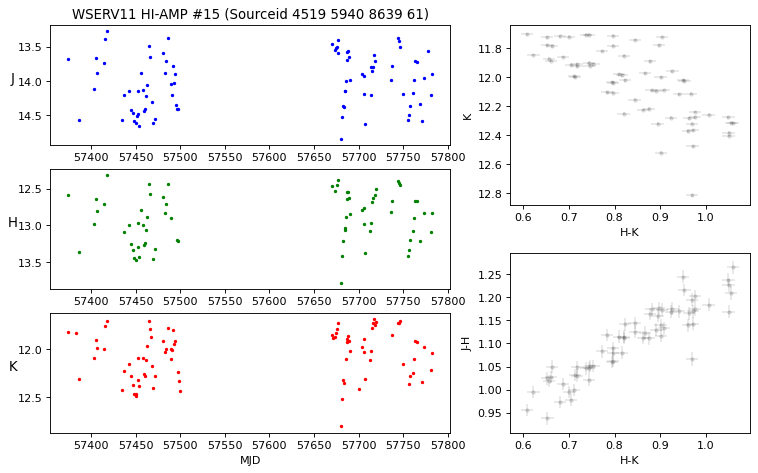

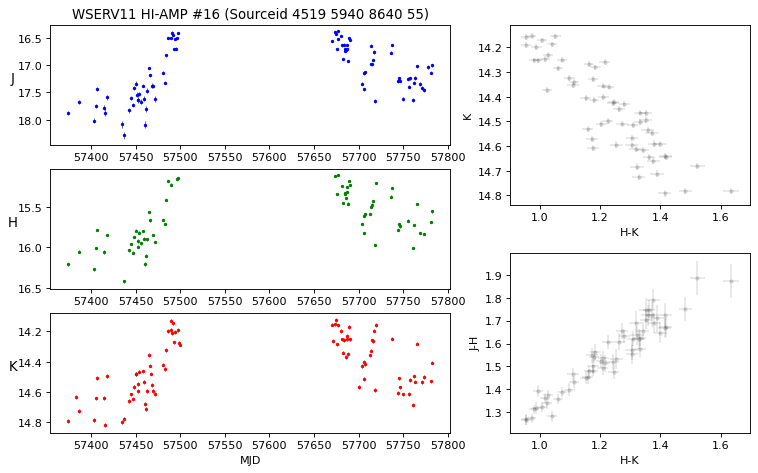

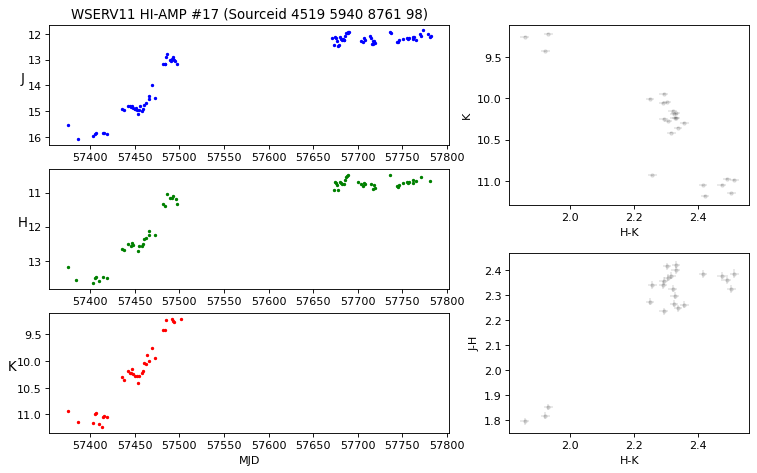

In [6]:

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    if wserv != 11:
        continue
    
    ds = spread[f'wserv{wserv}']
    dat = phot_grouped[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    hi_amp = 1.0
    
    krange = ds['range_9010']['KAPERMAG3']
    hrange = ds['range_9010']['HAPERMAG3']
    jrange = ds['range_9010']['JAPERMAG3']
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    # high-amps
    ha_2 = q1 & ~v1 & ((jrange > hi_amp) | (hrange > hi_amp) | (krange > hi_amp))

    sourceids = ds[ha_2].index

    print("Some additional high amplitude variables of note in WSERV11 (Mon R2)")

    for i, sid in enumerate(sourceids):
        ra = np.degrees(ds[v1 & ha]['median']['RA'].values[i])
        dec = np.degrees(ds[v1 & ha]['median']['DEC'].values[i])
        
        c = astropy.coordinates.SkyCoord(ra=ra, dec=dec, unit='deg')
        
        j = i+15
        
        print(f"\nWSERV{wserv} HI-AMP #{j} (Sourceid {sidsep(sid)})")
        print(f"  RA: {ra}, DEC: {dec}")
        print(f"  {c.to_string('hmsdms')}")
        print("\n")
        
        fig_lc = simple_lc(dat, sid)
        fig_lc.ax_j.set_title(f"WSERV{wserv} HI-AMP #{j} (Sourceid {sidsep(sid)})")

        fig_lc.savefig(f"HA_lcs_v1/WSERV{wserv}_HA{j}_sid{sid}.png")

        
    plt.show()
